![agents](images/header.jpg)
# Análisis léxico: Colocaciones y $N$-Gramas
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/Introducción.ipynb)



## Modelo de N-Gramas

Una característica de los lenguajes naturales es que las frases que los componen no tienen una distribución uniforme. Por el contrario, existen construcciones que son más comunes que otras. De esta manera, aunque las frases $f_1 = \textrm{"el perro camina"}$ y $f_2 = \textrm{"el perro vuela"}$ son ambas correctas sintácticamente, es más probable encontrar la frase $f_1$ que la frase $f_2$ en un texto arbitrario. 

En la película "*Take The Money And Run*", Virgil Starkwell (Woody Allen) intenta asaltar un banco y entrega al cajero una nota con el mensaje "*Please put fifty thousand dollars into this bag and act natural as I am pointing a gun at you*" que es leída por los empleados del banco como "*Please put fifty thousand dollars into this bag and ABT natural as I am pointing a GUB at you*". 

[![](images/i_have_a_gub.jpg)](https://www.youtube.com/watch?v=pEm0zi8QrpA)

Sin embargo, es obvio que la frase "*I am pointing a GUN at you*" es más probable que la frase "*I am pointing a GUB at you*", por lo que en la vida real no nos cuesta trabajo reconocer la frase correcta. Para modelar esta capacidad de predecir la ocurrencia de una palabra en una frase se utilizan **Modelos de lenguajes** que asignan probabilidades a las secuencias de palabras que pueden conformar un texto. 

El modelo más simple es el **Modelo de N-Gramas**". Este modelo asume que la probabilidad de ocurrencia de una palabra está determinada por las palabras recientes; lo que se conoce como la **suposición de Markov**. De manera que para el cálculo de estas probabilidades basta contabilizar la ocurrencia de secuencias de palabras de longitud definida. Un **$N$-Grama** es una secuencia de $N$ palabras. Así, por ejemplo, un 2-grama (o bigrama) es una secuencia de 2 palabras, como "*el hombre*", "*hombre camina*", "*camina en*", "*en el*", "*el parque*". Un 3-grama (trigrama) es una secuencia de tres palabras, como "*el hombre camina*", "*hombre camina en*", "*camina en el*", "*en el parque*". 

In [1]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

text = "los amigos toman cafe. el perro duerme en el parque. el hombre con el perro \
camina en el parque con amigos."

token = nltk.word_tokenize(text)
bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
tetragrams = ngrams(token,4)

bigrams_list = list(bigrams)
counter_bigrams = Counter(bigrams_list)
print ("Bigramas:\n", counter_bigrams)

trigrams_list = list(trigrams)
counter_trigrams = Counter(trigrams_list)
print ("\nTrigramas:\n", counter_trigrams)

tetragrams_list = list(tetragrams)
counter_tetragrams = Counter(tetragrams_list)
print ("\nTetragramas:\n", counter_tetragrams)

Bigramas:
 Counter({('.', 'el'): 2, ('el', 'perro'): 2, ('en', 'el'): 2, ('el', 'parque'): 2, ('los', 'amigos'): 1, ('amigos', 'toman'): 1, ('toman', 'cafe'): 1, ('cafe', '.'): 1, ('perro', 'duerme'): 1, ('duerme', 'en'): 1, ('parque', '.'): 1, ('el', 'hombre'): 1, ('hombre', 'con'): 1, ('con', 'el'): 1, ('perro', 'camina'): 1, ('camina', 'en'): 1, ('parque', 'con'): 1, ('con', 'amigos'): 1, ('amigos', '.'): 1})

Trigramas:
 Counter({('en', 'el', 'parque'): 2, ('los', 'amigos', 'toman'): 1, ('amigos', 'toman', 'cafe'): 1, ('toman', 'cafe', '.'): 1, ('cafe', '.', 'el'): 1, ('.', 'el', 'perro'): 1, ('el', 'perro', 'duerme'): 1, ('perro', 'duerme', 'en'): 1, ('duerme', 'en', 'el'): 1, ('el', 'parque', '.'): 1, ('parque', '.', 'el'): 1, ('.', 'el', 'hombre'): 1, ('el', 'hombre', 'con'): 1, ('hombre', 'con', 'el'): 1, ('con', 'el', 'perro'): 1, ('el', 'perro', 'camina'): 1, ('perro', 'camina', 'en'): 1, ('camina', 'en', 'el'): 1, ('el', 'parque', 'con'): 1, ('parque', 'con', 'amigos'): 1, (

### $N$-Gramas en la base de datos de personajes de comics

In [2]:
from IPython.display import display
import pandas as pd
pd.options.display.max_colwidth = 150 

In [3]:
import json

file = 'Data Sets/Comics/clean_comics.json'
with open(file) as comics_file:
    dict_comics = json.load(comics_file)

comicsDf = pd.DataFrame.from_dict(dict_comics)

display(comicsDf.head(1))

,description,main_words,name
0,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci...",'Mazing Man


In [4]:
#Sólo para reducir mi OCD
comicsDf = comicsDf.reindex_axis(['name',"description", "main_words"], axis=1)
display(comicsDf.head(1))

,name,description,main_words
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci..."


In [5]:
comicsDf["bigrams"] = list(map(lambda row: list(ngrams(word_tokenize(row),2)), 
                                   comicsDf.description))
display(comicsDf.head())

comics_bigrams = []
for row in comicsDf.bigrams:
    comics_bigrams.extend(row)
most_common_comics_bigrams = nltk.FreqDist(comics_bigrams)

print("Cantidad de bigramas en el corpus: ", most_common_comics_bigrams.N())
print("\nBigramas más populares:\n", most_common_comics_bigrams.most_common(50))

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: generator 'ngrams' raised StopIteration
  if __name__ == '__main__':


,name,description,main_words,bigrams
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci...","[(mazing, man), (man, is), (is, the), (the, title), (title, character), (character, of), (of, a), (a, comic), (comic, book), (book, series), (seri..."
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, published, quality, comics, first, appeared, police, comics, august, lasted, january,...","[(is, a), (a, fictional), (fictional, superhero), (superhero, from), (from, the), (the, golden), (golden, age), (age, of), (of, comics), (comics, ..."
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (brand, is), (is, a), (a, fictional), (fictional, chara..."
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha...","[(abin, sur), (sur, is), (is, a), (a, fictional), (fictional, character), (character, and), (and, a), (a, superhero), (superhero, from), (from, th..."
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, mach, mach, vii, currently, known, mach, x, fictional, character, appearin...","[(abner, ronald), (ronald, jenkins), (jenkins, formerly), (formerly, known), (known, as), (as, the), (the, beetle), (beetle, comics), (comics, bee..."


Cantidad de bigramas en el corpus:  3658794

Bigramas más populares:
 [(('of', 'the'), 28477), (('in', 'the'), 23622), (('x', 'men'), 9076), (('to', 'the'), 8773), (('marvel', 'comics'), 8651), (('and', 'the'), 8417), (('as', 'a'), 7959), (('with', 'the'), 7353), (('dc', 'comics'), 6006), (('by', 'the'), 5953), (('he', 'is'), 5579), (('in', 'a'), 5472), (('to', 'be'), 5203), (('spider', 'man'), 5192), (('is', 'a'), 4973), (('from', 'the'), 4648), (('on', 'the'), 4431), (('as', 'the'), 4374), (('of', 'his'), 4259), (('created', 'by'), 4168), (('he', 'was'), 4066), (('at', 'the'), 3881), (('category', 'fictional'), 3822), (('the', 'new'), 3721), (('for', 'the'), 3635), (('one', 'of'), 3621), (('during', 'the'), 3605), (('that', 'he'), 3455), (('the', 'character'), 3450), (('comic', 'book'), 3373), (('justice', 'league'), 3340), (('of', 'a'), 3300), (('the', 'x'), 3262), (('she', 'is'), 3209), (('the', 'team'), 2970), (('comics', 'characters'), 2937), (('appears', 'in'), 2889), (('appeare

## Colocaciones

En lexicología, una colocación es un término que designa combinaciones de unidades léxicas  que se distinguen por una frecuencia que resulta inesperadamente alta. En los bigramas anteriores destacan los siguientes:

<code>[... (('x', 'men'), 8457), ... (('marvel', 'comics'), 6206), ... (('spider', 'man'), 4942), ... (('dc', 'comics'), 3906), ... (('comic', 'book'), 3280), ... (('justice', 'league'), 2991), ... (('green', 'lantern'), 2288), ...]
</code>

Estos términos permiten hacer un análisis más inteligente del texto. Identificamos otras colocaciones importantes:

In [6]:
comicsDf["clean_bigrams"] = list(map(lambda words, bigrams: 
                                        [b for b in list(ngrams(words, 2))
                                        if b in bigrams], 
                                        comicsDf.main_words, comicsDf.bigrams))
display(comicsDf.head())

clean_bigrams = []
for row in comicsDf.clean_bigrams:
    clean_bigrams.extend(row)
common_clean_bigrams = nltk.FreqDist(clean_bigrams)

print("Cantidad de bigramas en el corpus: ", common_clean_bigrams.N())
print("\nBigramas más populares:\n", common_clean_bigrams.most_common(50))

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  from ipykernel import kernelapp as app


,name,description,main_words,bigrams,clean_bigrams
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci...","[(mazing, man), (man, is), (is, the), (the, title), (title, character), (character, of), (of, a), (a, comic), (comic, book), (book, series), (seri...","[(title, character), (comic, book), (book, series), (series, created), (bob, rozakis), (dc, comics), (series, ran), (twelve, issues), (additional,..."
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, published, quality, comics, first, appeared, police, comics, august, lasted, january,...","[(is, a), (a, fictional), (fictional, superhero), (superhero, from), (from, the), (the, golden), (golden, age), (age, of), (of, comics), (comics, ...","[(fictional, superhero), (golden, age), (quality, comics), (comics, first), (first, appeared), (police, comics), (comics, august), (killed, fictio..."
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (brand, is), (is, a), (a, fictional), (fictional, chara...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (fictional, character), (character, appearing), (americ..."
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha...","[(abin, sur), (sur, is), (is, a), (a, fictional), (fictional, character), (character, and), (and, a), (a, superhero), (superhero, from), (from, th...","[(abin, sur), (fictional, character), (dc, comics), (comics, dc), (dc, universe), (green, lantern), (lantern, corps), (best, known), (green, lante..."
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, mach, mach, vii, currently, known, mach, x, fictional, character, appearin...","[(abner, ronald), (ronald, jenkins), (jenkins, formerly), (formerly, known), (known, as), (as, the), (the, beetle), (beetle, comics), (comics, bee...","[(abner, ronald), (ronald, jenkins), (jenkins, formerly), (formerly, known), (beetle, comics), (comics, beetle), (beetle, mach), (mach, vii), (cur..."


Cantidad de bigramas en el corpus:  1080272

Bigramas más populares:
 [(('x', 'men'), 9076), (('marvel', 'comics'), 8656), (('dc', 'comics'), 6009), (('spider', 'man'), 5192), (('category', 'fictional'), 3822), (('comic', 'book'), 3374), (('justice', 'league'), 3340), (('comics', 'characters'), 2944), (('fictional', 'character'), 2562), (('green', 'lantern'), 2419), (('category', 'marvel'), 2335), (('category', 'comics'), 2223), (('characters', 'created'), 2146), (('category', 'characters'), 2137), (('captain', 'america'), 2064), (('category', 'dc'), 1810), (('characters', 'introduced'), 1793), (('superheroes', 'category'), 1749), (('comics', 'superheroes'), 1649), (('tv', 'series'), 1566), (('character', 'biography'), 1537), (('iron', 'man'), 1522), (('first', 'appeared'), 1474), (('fantastic', 'four'), 1425), (('teen', 'titans'), 1400), (('uncanny', 'x'), 1387), (('external', 'links'), 1377), (('wonder', 'woman'), 1300), (('super', 'heroes'), 1160), (('new', 'york'), 1097), (('public

En estos resultados observamos que todos los bigramas presentados tienen significado útil y algunos como <code>'x', 'men'</code>, <code>'spider', 'man'</code> y muchos otros, pierden sentido si se les separa. En estos casos, puede ser conveniente reemplazar el bigrama por un token: <code>'x_men'</code>, <code>'spider_man'</code>, etc. A continuación, generamos las colocaciones para todos los documentos (*all_collocations*) y analizamos sus estadísticas en el corpus.

In [7]:
comicsDf["all_collocations"] = list(map(lambda doc, bigrams: 
                            [b[0]+" "+b[1] for b in bigrams if b[0]+" "+b[1] in doc], 
                            comicsDf.description, comicsDf.clean_bigrams))
display(comicsDf.head())

clean_collocations = []
for row in comicsDf.all_collocations:
    clean_collocations.extend(row)
common_clean_collocations = nltk.FreqDist(clean_collocations)

print("Cantidad de bigramas en el corpus: ", common_clean_collocations.N())
print("\nBigramas más populares:\n", common_clean_collocations.most_common(50))

,name,description,main_words,bigrams,clean_bigrams,all_collocations
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci...","[(mazing, man), (man, is), (is, the), (the, title), (title, character), (character, of), (of, a), (a, comic), (comic, book), (book, series), (seri...","[(title, character), (comic, book), (book, series), (series, created), (bob, rozakis), (dc, comics), (series, ran), (twelve, issues), (additional,...","[title character, comic book, book series, series created, bob rozakis, dc comics, series ran, twelve issues, additional special, special issues, ..."
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, published, quality, comics, first, appeared, police, comics, august, lasted, january,...","[(is, a), (a, fictional), (fictional, superhero), (superhero, from), (from, the), (the, golden), (golden, age), (age, of), (of, comics), (comics, ...","[(fictional, superhero), (golden, age), (quality, comics), (comics, first), (first, appeared), (police, comics), (comics, august), (killed, fictio...","[fictional superhero, golden age, quality comics, comics first, first appeared, police comics, comics august, killed fictional, fictional characte..."
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (brand, is), (is, a), (a, fictional), (fictional, chara...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (fictional, character), (character, appearing), (americ...","[special agent, agent special, special agent, agent abigail, abigail brand, fictional character, character appearing, american comic, comic book, ..."
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha...","[(abin, sur), (sur, is), (is, a), (a, fictional), (fictional, character), (character, and), (and, a), (a, superhero), (superhero, from), (from, th...","[(abin, sur), (fictional, character), (dc, comics), (comics, dc), (dc, universe), (green, lantern), (lantern, corps), (best, known), (green, lante...","[abin sur, fictional character, dc comics, comics dc, dc universe, green lantern, lantern corps, best known, green lantern, lantern hal, hal jorda..."
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, mach, mach, vii, currently, known, mach, x, fictional, character, appearin...","[(abner, ronald), (ronald, jenkins), (jenkins, formerly), (formerly, known), (known, as), (as, the), (the, beetle), (beetle, comics), (comics, bee...","[(abner, ronald), (ronald, jenkins), (jenkins, formerly), (formerly, known), (beetle, comics), (comics, beetle), (beetle, mach), (mach, vii), (cur...","[abner ronald, ronald jenkins, jenkins formerly, formerly known, beetle comics, comics beetle, beetle mach, mach vii, currently known, mach x, fic..."


Cantidad de bigramas en el corpus:  1080272

Bigramas más populares:
 [('x men', 9076), ('marvel comics', 8656), ('dc comics', 6009), ('spider man', 5192), ('category fictional', 3822), ('comic book', 3374), ('justice league', 3340), ('comics characters', 2944), ('fictional character', 2562), ('green lantern', 2419), ('category marvel', 2335), ('category comics', 2223), ('characters created', 2146), ('category characters', 2137), ('captain america', 2064), ('category dc', 1810), ('characters introduced', 1793), ('superheroes category', 1749), ('comics superheroes', 1649), ('tv series', 1566), ('character biography', 1537), ('iron man', 1522), ('first appeared', 1474), ('fantastic four', 1425), ('teen titans', 1400), ('uncanny x', 1387), ('external links', 1377), ('wonder woman', 1300), ('super heroes', 1160), ('new york', 1097), ('publication history', 1045), ('captain marvel', 1016), ('marvel universe', 1004), ('civil war', 963), ('new mutants', 908), ('superhuman strength', 903), ('x

In [8]:
#colocaciones únicas
nc = len(common_clean_collocations.most_common())
print(nc, "colocaciones\n", 
      common_clean_collocations.most_common(20),
      "\n...\n",
      list(common_clean_collocations.most_common())[int(nc/500):int(nc/500)+20],
      "\n...\n",
      list(common_clean_collocations.most_common())[nc-20:])

425664 colocaciones
 [('x men', 9076), ('marvel comics', 8656), ('dc comics', 6009), ('spider man', 5192), ('category fictional', 3822), ('comic book', 3374), ('justice league', 3340), ('comics characters', 2944), ('fictional character', 2562), ('green lantern', 2419), ('category marvel', 2335), ('category comics', 2223), ('characters created', 2146), ('category characters', 2137), ('captain america', 2064), ('category dc', 1810), ('characters introduced', 1793), ('superheroes category', 1749), ('comics superheroes', 1649), ('tv series', 1566)] 
...
 [('exiles marvel', 83), ('alternate versions', 83), ('comics hercules', 83), ('marvel cinematic', 83), ('smallville season', 83), ('tiger shark', 83), ('diana prince', 83), ('idea mechanics', 82), ('writer artist', 82), ('history created', 82), ('comics exiles', 82), ('comics fear', 82), ('paperback comics', 82), ('life force', 82), ('mind controlled', 82), ('fun comics', 82), ('comics iceman', 82), ('film justice', 81), ('beyond gotham', 

A partir de este listado, con las 20 colocaciones más frecuentes, las 20 colocaciones menos frecuentes y 20 colocaciones con frecuencia media, observamos que no todas pueden tomarse como tokens, e incluso, la mayoría no tienen sentido como unidades. Construimos entonces las colocaciones tomando en cuenta el diccionario preliminar, reflejado en la columna <code>main_words</code> y mantenemos el nombre del personaje. Construimos una nueva columna con la descripción reescrita utilizando las colocaciones.

In [9]:
import math

comics_all_collocations = list(common_clean_collocations.keys())
dict_all_collocations = dict(zip(comics_all_collocations, [0]*nc))
for w in comics_all_collocations:
    for d in comicsDf.description:
        if(w in d):
            dict_all_collocations[w] += 1

top_collocations = []
numDocs_comics = len(comicsDf)
for d in comicsDf.description:
    N = len(d.split()) - 1 #El número de bigramas es el número de palabras - 1
    for w in reversed(comics_all_collocations): #En reversa para evitar problemas con los índices
        if(w in d):
            tfidf = d.count(w) / N * math.log(numDocs_comics/dict_all_collocations[w], 2)
            if(tfidf > 0.01):
                top_collocations.append(w)
                comics_all_collocations.remove(w)

In [11]:
collocations_tokens = [b for b in common_clean_collocations.most_common() 
                      if b[0] in top_collocations]
comicsDf = comicsDf.reindex(columns = ["name", "description", "main_words", "bigrams", 
                                        "clean_bigrams", "all_collocations", "new_description"])

for i, row in zip(range(len(comicsDf)), comicsDf.main_words):
    #Eliminar símbolos no alfanuméricos en el nombre
    n = re.sub("\.", "", comicsDf.loc[i, "name"])
    n = re.sub(r"-", "_", n)
    n = "_".join(re.sub("[\W]", " ", n).split()) + " "

    #reemplazar colocaciones por tokens unificados y eliminar palabras poco utilizadas
    s = " ".join(row)
    for w in collocations_tokens:
        s = re.sub(" " + w[0], " " + "_".join(w[0].split()), s)
    s = " ".join(s.split())

    #Agregar el título de la página en forma de token para rescatar el tema central 
    #que puede perderse como palabra sin utilidad
    comicsDf.loc[i, "new_description"] = n.lower() + s

display(comicsDf.head())

,name,description,main_words,bigrams,clean_bigrams,all_collocations,new_description
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci...","[(mazing, man), (man, is), (is, the), (the, title), (title, character), (character, of), (of, a), (a, comic), (comic, book), (book, series), (seri...","[(title, character), (comic, book), (book, series), (series, created), (bob, rozakis), (dc, comics), (series, ran), (twelve, issues), (additional,...","[title character, comic book, book series, series created, bob rozakis, dc comics, series ran, twelve issues, additional special, special issues, ...",mazing_man man title_character comic_book series_created bob_rozakis stephen published dc_comics series ran twelve_issues additional_special_issue...
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, published, quality, comics, first, appeared, police, comics, august, lasted, january,...","[(is, a), (a, fictional), (fictional, superhero), (superhero, from), (from, the), (the, golden), (golden, age), (age, of), (of, comics), (comics, ...","[(fictional, superhero), (golden, age), (quality, comics), (comics, first), (first, appeared), (police, comics), (comics, august), (killed, fictio...","[fictional superhero, golden age, quality comics, comics first, first appeared, police comics, comics august, killed fictional, fictional characte...",711_quality_comics fictional superhero golden_age comics_created george_published quality_comics first_appeared police_comics_august lasted januar...
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (brand, is), (is, a), (a, fictional), (fictional, chara...","[(special, agent), (agent, special), (special, agent), (agent, abigail), (abigail, brand), (fictional, character), (character, appearing), (americ...","[special agent, agent special, special agent, agent abigail, abigail brand, fictional character, character appearing, american comic, comic book, ...",abigail_brand special agent special agent abigail_brand fictional character_appearing american_comic_book published marvel_comics publication hist...
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha...","[(abin, sur), (sur, is), (is, a), (a, fictional), (fictional, character), (character, and), (and, a), (a, superhero), (superhero, from), (from, th...","[(abin, sur), (fictional, character), (dc, comics), (comics, dc), (dc, universe), (green, lantern), (lantern, corps), (best, known), (green, lante...","[abin sur, fictional character, dc comics, comics dc, dc universe, green lantern, lantern corps, best known, green lantern, lantern hal, hal jorda...",abin_sur abin sur fictional character_superhero dc_comics dc_universe member green_lantern corps best_known predecessor green_lantern hal_jordan a...
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, com

In [12]:
comicsDf.to_json("Data Sets/Comics/lexicon_comics.json", orient='records') 

A continuación, analizamos nuevamente el universo de palabras usadas en el corpus:

Cantidad de tokens en el corpus:  90132

Tokens más populares:
['x_men', 'character', 'comics', 'one', 'time', 'earth', 'marvel_comics', 'also', 'batman', 'spider_man', 'series', 'powers', 'appears', 'team', 'later', 'justice_league', 'however', 'superman', 'member', 'battle', 'dc_comics', 'revealed', 'new', 'death', 'avengers', 'created', 'father', 'version', 'introduced', 'characters', 'body', 'help', 'able', 'would', 'power', 'vol', 'killed', 'green_lantern', 'life', 'back', 'part', 'two', 'fight', 'voiced', 'first', 'fictional', 'wolverine', 'use', 'ability', 'used']
...
['steve_trevor', 'licensed', 'lied', 'user', 'pat', 'kole', 'trench', 'new_jersey', 'secret_warriors', 'salaak', 'vigilantes', 'boston', 'flash_vol', 'aphrodite', 'lightning_saga', 'neutralize', 'miniature', 'jumps', 'dormant', 'sunfire_comics', 'epic', 'anti_life_equation', 'captain_cold', 'carrie', 'selina_kyle', 'youngest', 'depressed', 'gray', 'comic_strip', 'lori', 'captain_dynamo', 'kents', 'pepper_potts', 'd

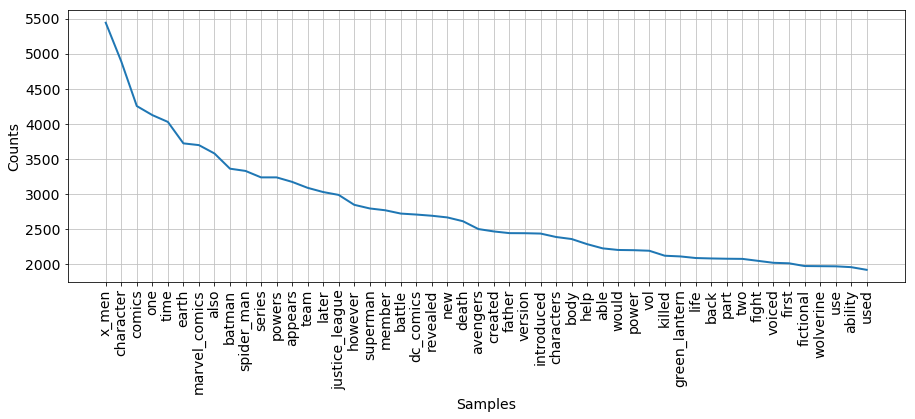

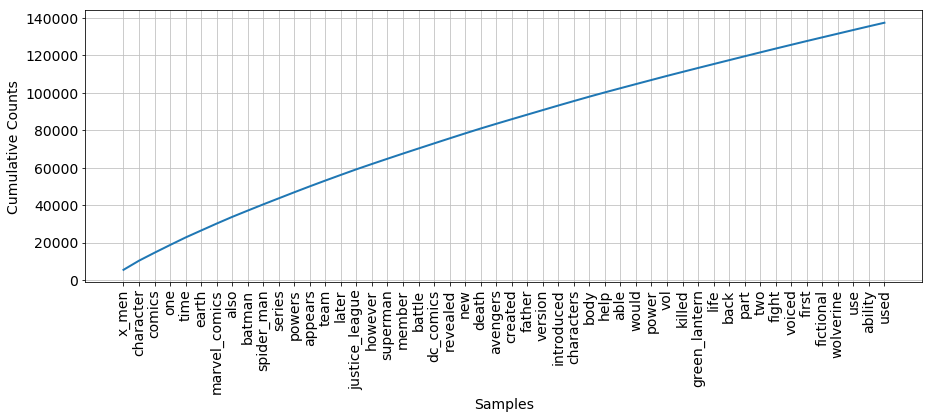

In [13]:
new_main_words = []
for row in comicsDf.new_description:
    new_main_words.extend(row.split())
common_new_main_words = nltk.FreqDist(new_main_words)

print("Cantidad de tokens en el corpus: ", len(common_new_main_words.most_common()))

lexicon_comics = [w[0] for w in common_new_main_words.most_common(6000)]
print("\nTokens más populares:\n{}\n...\n{}"
      .format(lexicon_comics[:50], lexicon_comics[5950:6000]))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
common_new_main_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
common_new_main_words.plot(50, cumulative=True)

De aquí se observa una simplificación del lenguaje. A partir de este punto, podemos volver a realizar el análisis para reducir el tamaño del conjunto de tokens utilizados. 

A partir de un procedimiento como el señalado, es posible automatizar la creación de un lexicón, aunque los últimos pasos tienen que hacerse con la intervención de un experto. 

## Conclusiones

El uso de $N$-Gramas y *colocaciones* permite anticipar el uso de palabras y aumentar la precisión del análisis léxico. Es de destacarse que esta aproximación agrega a la etapa del análisis léxico, elementos del análisis sintáctico e incluso del análisis semántico, al establecer un contexto a la ocurrencia de las palabras e incluso darle sentido a las palabras cuando vienen acompañadas por otras palabras (que definen el contexto).

<hr style="border-width: 3px;">

### Tarea 4

Realice las operaciones presentadas en esta lección para mejorar la construcción de su lexicón.

**Fecha de entrega**: Martes 5 de septiembre.